In [1]:
"""
Думаю, теперь я понимаю, как мы можем создать 
трехмерную поверхность волатильности.
в солидности.

Мы храним подразумеваемую волатильность в массивах. 
Поставщики ликвидности должны указать, 
как долго они будут хранить свою ликвидность в протоколе, 
подразумеваемую волатильность в течение периода
и максимальный диапазон "moneyness",
по которой они готовы продать опционы.
"""

'\nДумаю, теперь я понимаю, как мы можем создать \nтрехмерную поверхность волатильности.\nв солидности.\n\nМы храним подразумеваемую волатильность в массивах. \nПоставщики ликвидности должны указать, \nкак долго они будут хранить свою ликвидность в протоколе, \nподразумеваемую волатильность в течение периода\nи максимальный диапазон "moneyness",\nпо которой они готовы продать опционы.\n'

In [2]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://www.researchgate.net/profile/Rama-Cont/publication/2493001/figure/fig5/AS:669507337064449@1536634396297/Average-log-implied-volatility-surface-SP500-options.png")

In [3]:
# initialize pool values to 0

In [4]:
######### Midnight thought 3d HASH TABLE ##############

In [5]:
# init hashtable 

# 10x10xZ
Z = {}

t = 10
m = 10

for x in range(t):
    Z[x] = {}
    for y in range(m):
        Z[x][y] = 0

In [6]:
Z

{0: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0},
 1: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0},
 2: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0},
 3: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0},
 4: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0},
 5: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0},
 6: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0},
 7: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0},
 8: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0},
 9: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}}

In [7]:
# Moneyness range 
# m1 low end
# m2 high end

m1 = 2
m2 = 8

m = m2 - m1

m

6

In [8]:
def weightedAVGTest(w1,a1,w2,a2):
    return ((w1*a1) + (w2*a2)) / (w1 + w2)

weightedAVGTest(10,10,10,10)

10.0

In [9]:
######### WORKING HASHMAP FOR IMPLIED VOLATILITY AND LIQUIDITY SURFACES ########

In [10]:
# two hash tables 1) volatility 2) liquidity
def init(z,t,m):
    global V
    global L
    V = {}
    L = {}

    for x in range(t):
        V[x] = {}
        L[x] = {}
        for y in range (m):
            V[x][y] = z
            L[x][y] = z

init(0,10,10)

In [11]:
# add liquidity to liquidity surface
# add to specified range m
# area = m * time
# calculate average liquidity in space
# add user liquidity to average liqudity in space

def addLiquidity(m1,m2,t,amount):
    m = m2 - m1
    area = m * t    
    liquidity = 0 

    for x in range(t):
        mval = m1
        for y in range(m):
            liquidity += L[x][mval]
            mval+=1

    avgLiquidity = liquidity / area
    amount = amount / area

    for x in range(t):
        mval = m1
        for y in range(m):
            L[x][mval] = avgLiquidity + amount
            mval+=1

#addLiquidity(0,3,5,10)

In [12]:
def updateVol(m1,m2,t,amount,vol):
    m = m2 - m1 
    area = m * t
    totalVol = 0
    
    # calculate average vol over area m*t
    for x in range(t):
        mval = m1
        for y in range(m):
            totalVol += V[x][mval]
            mval += 1
    avgVol = totalVol / area

    # get total liquidity in area m*t
    totalLiquidity = getTotalLiquidity(m1,m2,t)
    
    print("avgVol", avgVol)
    print("total liquidity",totalLiquidity)
    print("vol", vol)
    print("amount", amount)
    
    # update volatility surface
    # update with weighted average 
    for x in range(t):
        mval = m1
        for y in range(m):
            V[x][mval] = ((totalLiquidity * avgVol) + (amount * vol)) / (totalLiquidity + amount)
            mval += 1

In [13]:
def getAVGliquidity(m1,m2,t):
    m = m2 - m1
    area = m * t    
    liquidity = 0 

    for x in range(t):
        mval = m1
        for y in range(m):
            liquidity += L[x][mval]
            mval+=1

    avgLiquidity = liquidity / area
    
    return avgLiquidity

In [14]:
def getTotalLiquidity(m1,m2,t):
    m = m2 - m1
    area = m * t    
    liquidity = 0 

    for x in range(t):
        mval = m1
        for y in range(m):
            liquidity += L[x][mval]
            mval+=1

    liquidity
    
    return liquidity

In [15]:
init(0,10,10)

In [16]:
# updateVol(m1,m2,t,amount,vol)
m1 = 0 # s/k = 0.5
m2 = 10 # s/k = 2
t = 10 # 1 year
amount = 5 # how much liquidity is added to pool
vol = 5 # implied volatility

updateVol(m1,m2,t,amount,vol)
addLiquidity(m1,m2,t,amount)

avgVol 0.0
total liquidity 0
vol 5
amount 5


In [17]:
# different LP provider positions
# m1,m2,time,amount,vol
LP1 = [0,3,5,5,10]
LP2 = [7,10,5,5,10]
LP3 = [2,8,7,10,5]
LP4 = [4,6,5,10,4]

In [18]:
init(0,10,10)

In [19]:
# add multiple users at once
def simulate(LP):
    
    m1,m2,t,amount,vol = LP
    
    updateVol(m1,m2,t,amount,vol)
    addLiquidity(m1,m2,t,amount)

simulate(LP1)
simulate(LP2)
simulate(LP3)
simulate(LP4)

avgVol 0.0
total liquidity 0
vol 10
amount 5
avgVol 0.0
total liquidity 0
vol 10
amount 5
avgVol 2.380952380952381
total liquidity 3.3333333333333335
vol 5
amount 10
avgVol 4.345238095238095
total liquidity 3.174603174603174
vol 4
amount 10


In [20]:
X = []
Y = []
Z = []

In [21]:
# convert nested hashmap (dictionary) to 3 arrays
for x in range(10):
    for y in range(10):
        X.append(x)
        Y.append(y)
        Z.append(V[x][y])
        

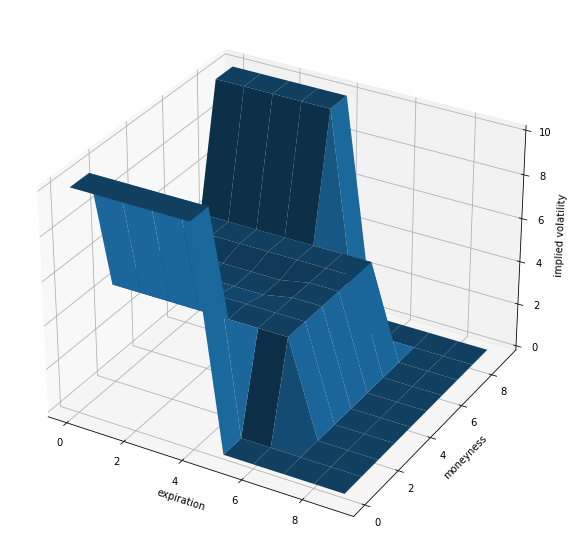

In [23]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

x = np.reshape(X, (10,10))
y = np.reshape(Y, (10,10))
z = np.reshape(Z, (10,10))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, y, z)

ax.set_xlabel('expiration')
ax.set_ylabel('moneyness')
ax.set_zlabel('implied volatility')


plt.rcParams["figure.figsize"] = (10,10)

plt.show()